In [1]:
import random

class sentiment():
    POSITIVE = 'POSITIVE'
    NEGATIVE = 'NEGATIVE'
    NEUTRAL = 'NEUTRAL'


class Review() :
    def __init__(self, text, score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()
        
    def get_sentiment(self):
        if self.score <= 2:
            return sentiment.NEGATIVE
        elif self.score == 3:
            return sentiment.NEUTRAL
        else :
            return sentiment.POSITIVE
            
class ReviewContainer():
    def __init__(self, reviews):
        self.reviews = reviews
    
    def get_text(self):
        return [x.text for x in self.reviews]
    
    def get_sentiment(self):
        return  [y.sentiment for y in self.reviews]
        
    def evenly_distribute(self):
        negative = list(filter(lambda x: x.sentiment == sentiment.NEGATIVE, self.reviews))
        positive = list(filter(lambda x: x.sentiment == sentiment.POSITIVE, self.reviews))
        positive_shrunk = positive[: len(negative)]
        self.reviews = negative + positive_shrunk
        random.shuffle(self.reviews)
        
#         print(negative[0].text)
#         print(len(negative))
#         print(len(positive))

In [2]:
import json

reviews = []
filename = './Books_small_10000.json'
with open(filename ) as f:
    for line in f:
        review = json.loads(line)
        reviews.append(Review(review['reviewText'], review['overall']))

In [3]:
reviews[5].text

'I hoped for Mia to have some peace in this book, but her story is so real and raw.  Broken World was so touching and emotional because you go from Mia\'s trauma to her trying to cope.  I love the way the story displays how there is no "just bouncing back" from being sexually assaulted.  Mia showed us how those demons come for you every day and how sometimes they best you. I was so in the moment with Broken World and hurt with Mia because she was surrounded by people but so alone and I understood her feelings.  I found myself wishing I could give her some of my courage and strength or even just to be there for her.  Thank you Lizzy for putting a great character\'s voice on a strong subject and making it so that other peoples story may be heard through Mia\'s.'

In [4]:
reviews[5].score

5.0

In [5]:
reviews[789].sentiment

'POSITIVE'

In [6]:
len(reviews)

10000

In [7]:
from sklearn.model_selection import train_test_split
training, test  = train_test_split(reviews, test_size = 0.33, random_state = 42)

train_container = ReviewContainer(training)
test_container = ReviewContainer(test)

train_container.evenly_distribute()
len(train_container.reviews)

872

In [8]:
print(len(training))
print(len(test))

6700
3300


In [9]:
# independent variable  = text
# dependent variable = sentiment
train_x = train_container.get_text()
train_y = train_container.get_sentiment()

test_container.evenly_distribute()
test_x = test_container.get_text()
test_y = test_container.get_sentiment()

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

train_x_vector = vectorizer.fit_transform(train_x)

test_x_vector = vectorizer.transform(test_x)
# for further explanation
# visit  https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [11]:
print(train_x_vector)

  (0, 7976)	1
  (0, 991)	3
  (0, 3652)	1
  (0, 5384)	1
  (0, 1362)	1
  (0, 5478)	1
  (0, 7617)	1
  (0, 8608)	1
  (0, 5408)	2
  (0, 833)	1
  (0, 4034)	3
  (0, 465)	1
  (0, 8627)	1
  (0, 423)	2
  (0, 3344)	1
  (0, 2229)	1
  (0, 3810)	1
  (0, 5260)	1
  (0, 4188)	1
  (0, 4277)	3
  (0, 4264)	2
  (0, 767)	1
  (0, 3967)	1
  (0, 3968)	1
  (0, 8879)	2
  :	:
  (871, 991)	1
  (871, 5478)	1
  (871, 8608)	1
  (871, 423)	1
  (871, 5260)	2
  (871, 4188)	1
  (871, 6392)	1
  (871, 7929)	4
  (871, 8052)	2
  (871, 7533)	1
  (871, 2416)	1
  (871, 7463)	1
  (871, 3452)	1
  (871, 3900)	1
  (871, 8685)	1
  (871, 6411)	1
  (871, 5497)	1
  (871, 8110)	1
  (871, 7535)	1
  (871, 634)	1
  (871, 5073)	1
  (871, 809)	1
  (871, 8905)	1
  (871, 5371)	1
  (871, 2511)	1


In [12]:
print(train_y)

['NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NE

In [13]:
print(test_x_vector)

  (0, 660)	1
  (0, 3495)	2
  (0, 3619)	1
  (0, 3652)	1
  (0, 3737)	1
  (0, 4264)	1
  (0, 4277)	1
  (0, 4472)	1
  (0, 5185)	1
  (0, 5222)	1
  (0, 5408)	1
  (0, 5426)	1
  (0, 5478)	1
  (0, 6634)	1
  (0, 7987)	1
  (0, 8052)	1
  (0, 8124)	1
  (0, 8551)	1
  (0, 8608)	1
  (0, 8679)	1
  (0, 8823)	1
  (1, 285)	2
  (1, 347)	2
  (1, 386)	1
  (1, 416)	1
  :	:
  (415, 6078)	1
  (415, 6176)	1
  (415, 6473)	1
  (415, 6582)	1
  (415, 6906)	1
  (415, 7064)	1
  (415, 7533)	1
  (415, 7597)	1
  (415, 7764)	1
  (415, 7929)	18
  (415, 7968)	1
  (415, 7976)	1
  (415, 8036)	1
  (415, 8048)	1
  (415, 8052)	6
  (415, 8123)	1
  (415, 8276)	1
  (415, 8428)	1
  (415, 8670)	1
  (415, 8679)	1
  (415, 8685)	1
  (415, 8692)	1
  (415, 8693)	1
  (415, 8791)	1
  (415, 8841)	1


In [14]:
print(train_y)

['NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NE

### Support vector machine

In [15]:
from sklearn.svm import SVC
clf_svc = SVC(kernel='linear')
clf_svc.fit(train_x_vector, train_y)

SVC(kernel='linear')

In [16]:
clf_svc.predict(test_x_vector[0])

array(['POSITIVE'], dtype='<U8')

### decision tree 


In [17]:
#
from sklearn.tree import DecisionTreeClassifier
clf_dtc = DecisionTreeClassifier()
clf_dtc.fit(train_x_vector, train_y)

DecisionTreeClassifier()

In [18]:
clf_dtc.predict(test_x_vector[0])

array(['NEGATIVE'], dtype='<U8')

### naive bayes 

In [19]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(train_x_vector.toarray(), train_y)

GaussianNB()

In [20]:
clf_gnb.predict(test_x_vector[0].toarray())

array(['POSITIVE'], dtype='<U8')

### logistic regression 

In [21]:
from sklearn.linear_model import LogisticRegression
clf_lgr = LogisticRegression()
clf_lgr.fit(train_x_vector , train_y)

LogisticRegression()

In [22]:
clf_lgr.predict(test_x_vector[0])

array(['POSITIVE'], dtype='<U8')

### Evaluation

## mean accuracy 

In [23]:
#svm
m1 = clf_svc.score(test_x_vector, test_y)
print(m1)

0.7980769230769231


In [24]:
#decision tree classifier
m2 = clf_dtc.score(test_x_vector, test_y)
print(m2)

0.6418269230769231


In [25]:
# naive bayes 
m3 = clf_gnb.score(test_x_vector.toarray(), test_y)
print(m3)

0.6346153846153846


In [26]:
# logistic regression
m4 = clf_lgr.score(test_x_vector, test_y)
print(m4)

0.8149038461538461


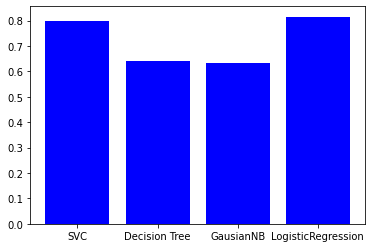

In [27]:
y = [m1, m2,m3,m4]
x = ['SVC', "Decision Tree", 'GausianNB','LogisticRegression']

import matplotlib.pyplot as plt
#plt.ylim(0.70, 0.85)
plt.bar(x,y, color = 'blue')
plt.show()



##  F1 score

In [28]:
# f1 score of each model
from sklearn.metrics import f1_score
svm_f1 = f1_score(test_y, clf_svc.predict(test_x_vector), average=None, labels=[sentiment.POSITIVE,sentiment.NEGATIVE, sentiment.NEUTRAL ])
dtc_f1 = f1_score(test_y, clf_dtc.predict(test_x_vector), average=None, labels=[sentiment.POSITIVE,sentiment.NEGATIVE, sentiment.NEUTRAL ])
gnb_f1 = f1_score(test_y, clf_gnb.predict(test_x_vector.toarray()), average=None, labels=[sentiment.POSITIVE,sentiment.NEGATIVE, sentiment.NEUTRAL ])
lgr_f1 = f1_score(test_y, clf_lgr.predict(test_x_vector), average=None, labels=[sentiment.POSITIVE,sentiment.NEGATIVE, sentiment.NEUTRAL ])

print(svm_f1, dtc_f1, gnb_f1,lgr_f1, sep='\n')

[0.8028169  0.79310345 0.        ]
[0.64775414 0.63569682 0.        ]
[0.59574468 0.66666667 0.        ]
[0.82051282 0.808933   0.        ]


C:\Users\Bharati\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1464: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\Bharati\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1464: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


In [29]:
train_y.count(sentiment.POSITIVE)

436

In [30]:
my_test = ['this is great book overall', ' this is worst book', 'this book is amazing and i recommend it']

clf_lgr.predict(vectorizer.transform(my_test))

array(['POSITIVE', 'NEGATIVE', 'POSITIVE'], dtype='<U8')

### tuning our model with gridsearch


In [31]:
from sklearn.model_selection import GridSearchCV

parameter = {'kernel':('linear', 'rbf'), 'C': (1,4,8,16,32)}
clf = GridSearchCV(clf_svc, parameter)
clf.fit(train_x_vector, train_y)

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': (1, 4, 8, 16, 32), 'kernel': ('linear', 'rbf')})

### saving model

In [38]:
import os 
import shutil
for file in os.listdir():
    if file == 'sentiment_classifier.pkl':
        os.remove(file)

In [39]:
os.listdir()

['.ipynb_checkpoints',
 'Books_small.json',
 'Books_small_10000.json',
 'Sentiment_analyser.ipynb',
 'Sentiment_analyser_1000.ipynb',
 'Sentiment_analyser_10000.ipynb',
 'Untitled1.ipynb']

In [40]:
import pickle 
with open('sentiment_analyser.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [41]:
with open('sentiment_analyser.pickle', 'rb') as f:
    content = pickle.load(f)
    
print(content)
    

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': (1, 4, 8, 16, 32), 'kernel': ('linear', 'rbf')})


In [43]:
print(test_x[0])
content.predict(test_x_vector[0])

I was kind of disapponted. Thought Ms. Ronstadt would reveal more. Great voice not great author. It is tragic what has happened to her now.


array(['POSITIVE'], dtype='<U8')

In [45]:
import pickle 
f1 = open('sentiment_analyser.pickle')
content = pickle.load(f1)
f2 = ('senti.pickle', "wb")
pickle.dump(content)
f1.close()
f2.close()
    

UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 63: character maps to <undefined>